In [86]:
import pandas as pd
data = {
    "Alimento": [
        "Proteína de suero en polvo", "Lomo embuchado", "Atún en lata", "Pechuga de pollo", "Lomo de cerdo",
        "Filete de ternera", "Queso parmesano", "Salchichón", "Chorizo", "Lentejas", "Almendras", "Sardinas",
        "Garbanzos", "Atún fresco", "Bacalao", "Gambas", "Soja", "Pistachos", "Caballa", "Merluza", "Tofu",
        "Salmón", "Anchoas", "Trucha", "Yogur natural", "Queso mozzarella", "Nueces", "Jamón serrano", "Huevos",
        "Calamares", "Queso cheddar", "Leche entera", "Langostinos", "Mejillones", "Queso roquefort", "Brócoli",
        "Alubias", "Leche de soja", "Almejas", "Queso camembert", "Espinacas", "Guisantes", "Leche de almendras",
        "Queso de cabra", "Leche de avena", "Queso ricotta", "Leche de coco", "Leche de arroz", "Mantequilla"
    ],
    "Proteínas (por cada 100 g)": [
        80, 50, 32, 31, 30, 29, 28, 28, 27, 26, 21, 21, 21, 21, 20, 20, 20, 20, 19, 19, 17, 17, 17, 17, 16, 16,
        15, 15, 13, 13, 13, 12, 12, 12, 11, 11, 10, 10, 9, 8, 6, 6, 5, 5, 4, 3, 2, 1, 1
    ]
}
def add_alimento(df, alimento, protein_value):
    """
    Adds a new alimento and its protein value to the DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to which the new row will be added.
        alimento (str): The name of the new alimento.
        protein_value (float): The protein value (per 100 g) of the new alimento.
    
    Returns:
        pd.DataFrame: The updated DataFrame with the new row added.
    """
    # Create a new row as a DataFrame
    new_row = pd.DataFrame({"Alimento": [alimento], "Proteínas (por cada 100 g)": [protein_value]})
    
    # Concatenate the new row to the existing DataFrame
    df = pd.concat([df, new_row], ignore_index=True)
    
    return df

# Add a new alimento

# Display the updated DataFrame
# print(df.tail())  # Show the last few rows to verify the addition

# Create DataFrame
alimentos = pd.DataFrame(data)
alimentos = add_alimento(alimentos, "Quinoa", 14)

# alimentos

In [89]:
import unicodedata
def remove_accents(text):
    """
    Removes accents from a string.
    """
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
def get_protein_value(input_name, df):
    """
    Returns the protein value for a given alimento based on input variations.
    
    Parameters:
        input_name (str): The input alimento name (e.g., "huevo", "Huevos", "huevos").
        df (pd.DataFrame): The DataFrame containing the alimento names and protein values.
    
    Returns:
        float: The protein value (per 100 g) or a message if the alimento is not found.
    """
    # Normalize input: lowercase, remove accents, and remove trailing 's'
    normalized_input = remove_accents(input_name.lower().rstrip('s'))
    
    # Normalize alimento names in the DataFrame
    df['Normalized'] = df['Alimento'].apply(lambda x: remove_accents(x.lower().rstrip('s')))
    
    # Check if the normalized input partially matches any alimento
    match = df[df['Normalized'].str.contains(normalized_input, regex=False)]
    
    if not match.empty:
        return match.iloc[0]['Proteínas (por cada 100 g)']  # Return the protein value
    else:
        return "Alimento no encontrado"  # Return a message if not found
# Example usage
print(get_protein_value("huevo", alimentos))  # Output: 13
print(get_protein_value("huevo", alimentos))  # Output: 13
print(get_protein_value("lenteja", alimentos))  # Output: 26
print(get_protein_value("Atun", alimentos))  # Output: 32
print(get_protein_value("pechuga", alimentos))  # Output: 31
print(get_protein_value("quinoa", alimentos))  # Output: Alimento no encontrado

13
13
26
32
31
14


In [84]:
import astropy.units as u

mass_kg = 80 * u.kg  # Example mass
mass_lb = mass_kg.to(u.imperial.lb)  # Convert to pounds

print(mass_lb)

protein  = lambda w: 1.2*w
print('Proteina diaria necesaria:', protein(mass_lb.value)*u.g)

Canitdad_de_agua = 0.5*(u.imperial.oz).to('g')*mass_lb.value
print('Cantidad de agua:',Canitdad_de_agua/1000, 'l')

176.36980974790205 lb
Proteina diaria necesaria: 211.64377169748246 g
Cantidad de agua: 2.5 l


In [73]:
2*get_protein_value('pollo',alimentos)
2*get_protein_value('avena',alimentos)


8

176.36980974790205 lb
Proteina diaria necesaria: 211.64377169748246 g
216


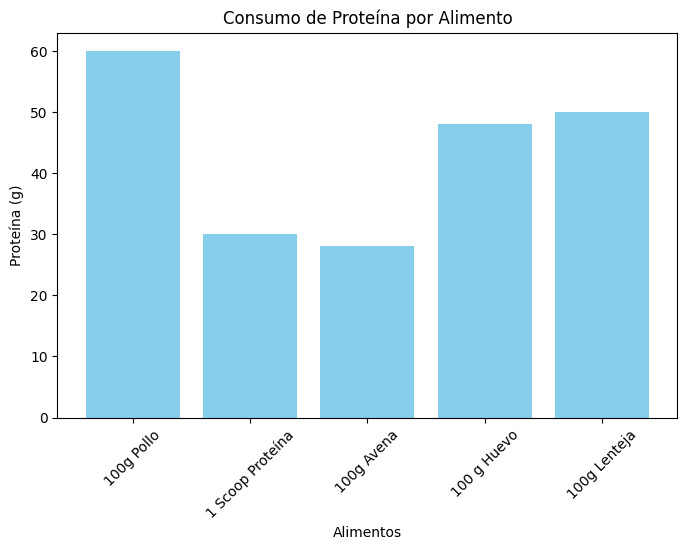

In [32]:


import matplotlib.pyplot as plt

def visualizar_proteina(consumo):
    alimentos = {
        "100g Pollo": 30,
        "1 Scoop Proteína": 30,
        "100g Avena": 14,
        "100 g Huevo": 12,
        "100g Lenteja": 25
    }
    
    consumo_proteina = {alimento: cantidad * alimentos[alimento] for alimento, cantidad in consumo.items()}
    print(sum(consumo_proteina.values()))
    plt.figure(figsize=(8, 5))
    plt.bar(consumo_proteina.keys(), consumo_proteina.values(), color='skyblue')
    plt.xlabel("Alimentos")
    plt.ylabel("Proteína (g)")
    plt.title("Consumo de Proteína por Alimento")
    plt.xticks(rotation=45)
    plt.show()

# Ejemplo de uso
dieta = {
    "100g Pollo": 2,  # 2 porciones de 100g de pollo
    "1 Scoop Proteína": 1,
    "100g Avena": 2,
    "100 g Huevo": 4,
    "100g Lenteja": 2
}

visualizar_proteina(dieta)